In [2]:
from reservoir_computing import rc
import numpy as np

In [3]:
r_c=rc(10000)
r_c.change_warm(100)

init okk


In [3]:
#Q1,grid search
scale_list=np.linspace(0.1, 1, 5)
radius_list=np.linspace(0.1, 1.5, 5)
rho_list=np.linspace(0.1, 1, 5)
reg_list=np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1])

In [5]:
i=0
#mse_list=np.zeros(750)
#para_list=np.zeros(750,4)
min_mse=100
min_mse2=100
min_para=[0,0,0,0]
min_para2=[0,0,0,0]
for scale in scale_list:
    r_c.update_Win(scale)
    for radius in radius_list:
        for rho in rho_list:
            r_c.update_Wres(radius,rho)
            X=r_c.sampling()
            for reg in reg_list:
                mse=r_c.training(X,reg,9900)[0]
                if mse<min_mse:
                    min_mse=mse
                    min_para=[scale,radius,rho,reg]
                else:
                    if mse<min_mse2:
                        min_mse2=mse
                        min_para2=[scale,radius,rho,reg]
                """
                mse_list[i]=mse
                para_list=[scale,radius,rho,reg]
                i=i+1
                """

print("scale:",min_para[0],"radius:",min_para[1],"rho:",min_para[2],"reg:",min_para[3],"mse:",min_mse)
print("scale:",min_para2[0],"radius:",min_para2[1],"rho:",min_para2[2],"reg:",min_para2[3],"mse:",min_mse2)
  

scale: 0.325 radius: 1.5 rho: 0.1 reg: 1e-05 mse: 0.0010918061104381743
scale: 1.0 radius: 1.5 rho: 0.1 reg: 1e-05 mse: 0.0010918174754745269


In [5]:
scale_list=np.linspace(0.32, 0.33, 5)
radius_list=np.linspace(1.3, 1.5, 5)
rho_list=np.linspace(0.7, 0.8, 5)
reg_list=np.array([1e-5,5e-5,1e-4,5e-4,1e-3])

In [6]:
min_mse=100
min_para=[0,0,0,0]
for scale in scale_list:
    r_c.update_Win(scale)
    for radius in radius_list:
        for rho in rho_list:
            r_c.update_Wres(radius,rho)
            for reg in reg_list:
                X=r_c.sampling()
                mse=r_c.training(X,reg,9999)[0]
                if mse<=min_mse:
                    min_mse=mse
                    min_para=[scale,radius,rho,reg]
print("scale:",min_para[0],"radius:",min_para[1],"rho:",min_para[2],"reg:",min_para[3],"mse:",min_mse)
  

scale: 0.33 radius: 1.3 rho: 0.775 reg: 1e-05 mse: 0.0010956525013742977


In [3]:
r_c.update_Win(0.33)
r_c.update_Wres(1.35,0.8)
X=r_c.sampling()
mse=r_c.training(X,0.0005,9999)
print(mse)

(0.0016117154041345415, 0.00024058259800807747)


<function matplotlib.pyplot.show(close=None, block=None)>

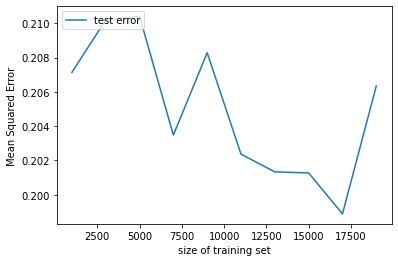

In [3]:
#learning curve
import matplotlib.pyplot as plt
learn_list=np.linspace(1000,19000,10)
mse_list=np.zeros(len(learn_list))
mse1_list=np.zeros(len(learn_list))
i=0
for learn in learn_list:
    learn=int(learn)
    r_c.update_trainLen(learn)
    X=r_c.sampling()
    mse_list[i],mse1_list[i]=r_c.training(X,1e-5,min(learn-1,19999-learn))
    i=i+1
plt.plot(learn_list,mse_list)
#plt.plot(learn_list,mse1_list)
plt.ylabel("Mean Squared Error")
plt.xlabel("size of training set")
plt.legend(['test error'], loc='upper left')
plt.show

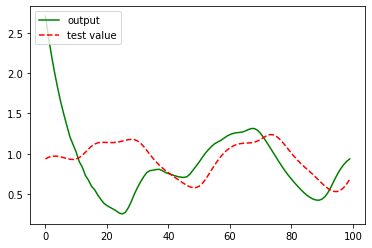

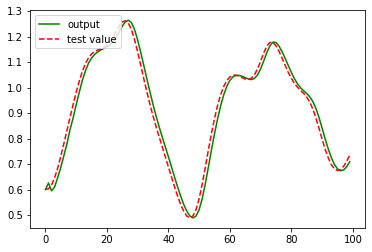

0.0010995267669993225 2.045850726362233e-06


In [49]:
#Q3
r_c.update_trainLen(10000)
r_c.update_Win(0.33)
r_c.update_Wres(1.3,0.775)
X=r_c.sampling()
mse,mse1=r_c.training(X,0.00001,9000,show=True,num=100)
print(mse,mse1)

In [3]:
#Q4,sensitivity
scale_list=np.linspace(0.1, 1, 10)
radius_list=np.linspace(0.1, 1.5, 10)
rho_list=np.linspace(0.1, 1, 10)
reg_list=np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1])
r_c.update_trainLen(10000)

<function matplotlib.pyplot.show(close=None, block=None)>

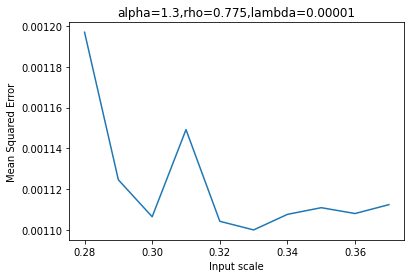

In [8]:
import matplotlib.pyplot as plt
scale_list=np.linspace(0.28, 0.37, 10)
r_c.update_trainLen(10000)
r_c.update_Win(0.33)
r_c.update_Wres(1.3,0.775)
mse_list=np.zeros(len(scale_list))
i=0
for scale in scale_list:
    r_c.update_Win(scale)
    X=r_c.sampling()
    mse_list[i]=r_c.training(X,1e-5,9999)[0]
    i=i+1
plt.plot(scale_list,mse_list)
plt.ylabel("Mean Squared Error")
plt.xlabel("Input scale")
plt.title("alpha=1.3,rho=0.775,lambda=0.00001")
plt.show    
    

<function matplotlib.pyplot.show(close=None, block=None)>

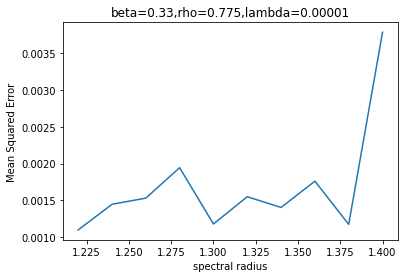

In [12]:
r_c.update_trainLen(10000)
r_c.update_Win(0.33)
r_c.update_Wres(1.3,0.775)

radius_list=np.linspace(1.22, 1.4, 10)
mse_list=np.zeros(len(radius_list))
i=0
for radius in radius_list:
    r_c.update_Wres(radius,0.4)
    X=r_c.sampling()
    mse_list[i]=r_c.training(X,1e-5,9999)[0]
    i=i+1
plt.plot(radius_list,mse_list)
plt.ylabel("Mean Squared Error")
plt.xlabel("spectral radius")
plt.title("beta=0.33,rho=0.775,lambda=0.00001")
plt.show    

<function matplotlib.pyplot.show(close=None, block=None)>

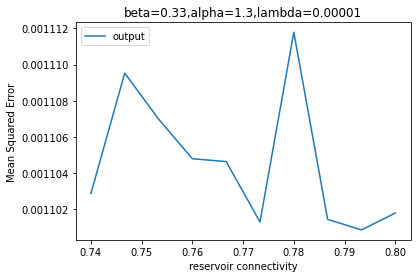

In [7]:
r_c.update_trainLen(10000)
r_c.update_Win(0.33)
r_c.update_Wres(1.3,0.775)
rho_list=np.linspace(0.74, 0.8, 10)
mse_list=np.zeros(len(rho_list))
i=0
for rho in rho_list:
    r_c.update_Wres(0.8,rho)
    X=r_c.sampling()
    mse_list[i]=r_c.training(X,1e-5,9999)[0]
    i=i+1
plt.plot(rho_list,mse_list)
plt.ylabel("Mean Squared Error")
plt.xlabel("reservoir connectivity")
plt.legend(['output', 'test value'], loc='upper left')
plt.title("beta=0.33,alpha=1.3,lambda=0.00001")
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

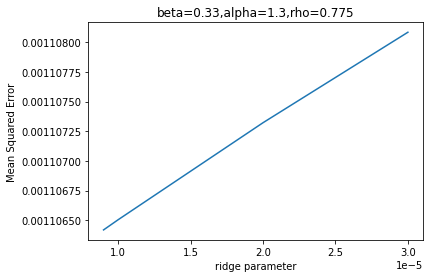

In [11]:
r_c.update_trainLen(10000)
r_c.update_Win(0.33)
r_c.update_Wres(1.3,0.775)
reg_list=np.array([0.000009,0.00001,0.00002,0.00003])
mse_list=np.zeros(len(reg_list))
i=0
X=r_c.sampling()
for reg in reg_list:
    mse_list[i]=r_c.training(X,reg,9999)[0]
    i=i+1
plt.plot(reg_list,mse_list)
plt.ylabel("Mean Squared Error")
plt.xlabel("ridge parameter")
plt.title("beta=0.33,alpha=1.3,rho=0.775")
plt.show   

In [25]:
#Q5,warm-up sequence
r_c.update_Win(0.33)
r_c.update_Wres(1.5,0.775)
r_c.change_warm(100)
X=r_c.sampling()
mse=r_c.training(X,1e-5,9000,num=1000)
print(mse)

(0.001094558469187579, 2.3086703797060862e-07)


In [4]:
#Q6 
#X=r_c.sampling()
#r_c.training(X)
r_c.change_warm(100)
r_c.update_Win(1)
r_c.update_Wres(1.5,0.15)
X=r_c.sampling()
mse,mse1=r_c.training_online(X,0.00001,9000,num=1000)
print(mse,mse1)

(9900,)
0.007643704491976272 0.0010638594312202003


In [ ]:
#bonus: just change some sentences in reservoir_computing